In [1]:
# %load_ext lab_black

import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt

### 1. Red Neuronal Feed Forward en PyTorch

#### Resolver el ejercicio 2 de la Clase 2 utilizando una red neuronal feed forward en PyTorch. Pueden usar los notebooks de la clase de referencia.

El enunciado número 2 de la clase 2 es el siguiente:

*"Crear un dataset sintético con 10,000 muestras a partir de la siguiente expresión (donde $x$ es la feature que toma valores entre 0 y 4, e $y$ es la salida)"*

$y = -(x - 2)^{2} + 3 + 0.2 sin(16x)$

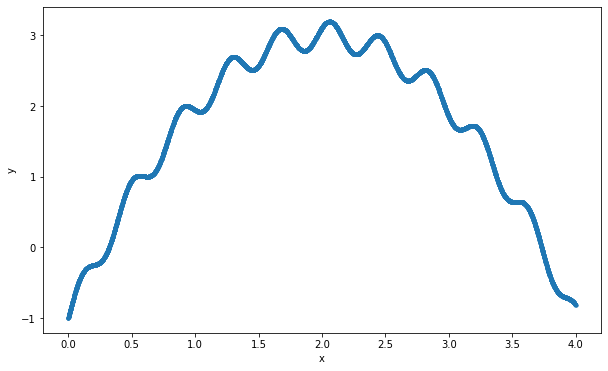

In [2]:
n_samples = 10000

f = lambda x: -((x - 2) ** 2) + 3 + 0.2 * np.sin(16 * x)

x = np.random.uniform(low=0, high=4, size=n_samples)
y = f(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker=".")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Creamos un modelo simple con una entrada, una capa intermedia de dos neuronas y una salida sin funcion de activación ya que es un problema de regresión.

In [3]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_linear = nn.Linear(1, 2)
        self.hidden_activation = nn.Tanh()
        self.output_linear = nn.Linear(2, 1)
        self.loss = nn.MSELoss()

    def forward(self, input):
        out = self.hidden_linear(input)
        out = self.hidden_activation(out)
        out = self.output_linear(out)
        return out

    def fit(self, X, Y, batch=1000, epochs=1000, lr=0.01):
        n = x.shape[0]
        optimizer = optim.SGD(self.parameters(), lr=lr)
        cost = []
        for epoch in range(epochs):
            total = 0
            batch_counter = 0
            for batch_start in range(0, n, batch):
                batch_end = min(batch_start + batch, n)
                y_pred = self.forward(X[batch_start:batch_end])
                loss = self.loss(y_pred, Y[batch_start:batch_end])
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                total += loss.item()
                batch_counter += 1
            cost.append(total / batch_counter)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: {cost[-1]:.4f}")
        return cost

In [4]:
X = torch.Tensor(np.array([x])).t()
Y = torch.Tensor(np.array([y])).t()

model = Model()
history = model.fit(X, Y)

Epoch 0: 3.4276
Epoch 100: 0.3473
Epoch 200: 0.0975
Epoch 300: 0.0595
Epoch 400: 0.0432
Epoch 500: 0.0348
Epoch 600: 0.0301
Epoch 700: 0.0273
Epoch 800: 0.0256
Epoch 900: 0.0245


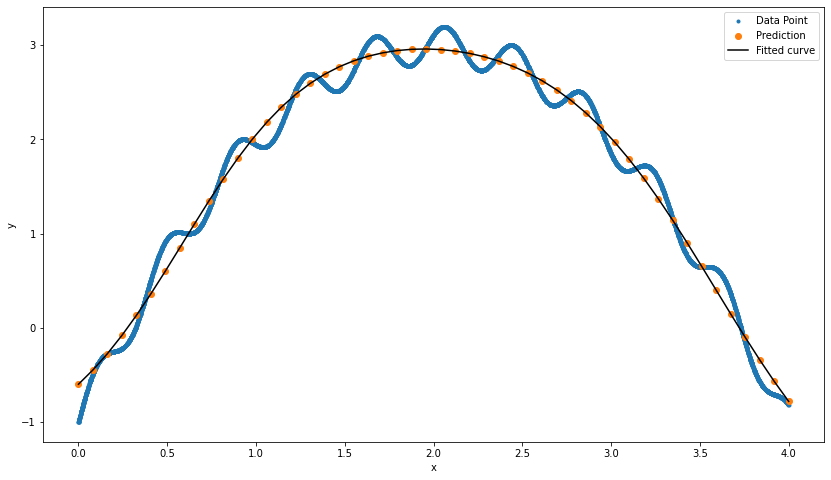

In [5]:
x_test = np.linspace(0, 4, 50)
X_test = torch.Tensor(np.array([x_test])).t()

Y_pred = model.forward(X_test)
y_pred = Y_pred.detach().numpy()

plt.figure(figsize=(14, 8))
plt.scatter(x, y, label="Data Point", marker=".")
plt.scatter(x_test, y_pred, label="Prediction")
plt.plot(x_test, y_pred, color="k", label="Fitted curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

La variación de loss por epoch es la siguiente

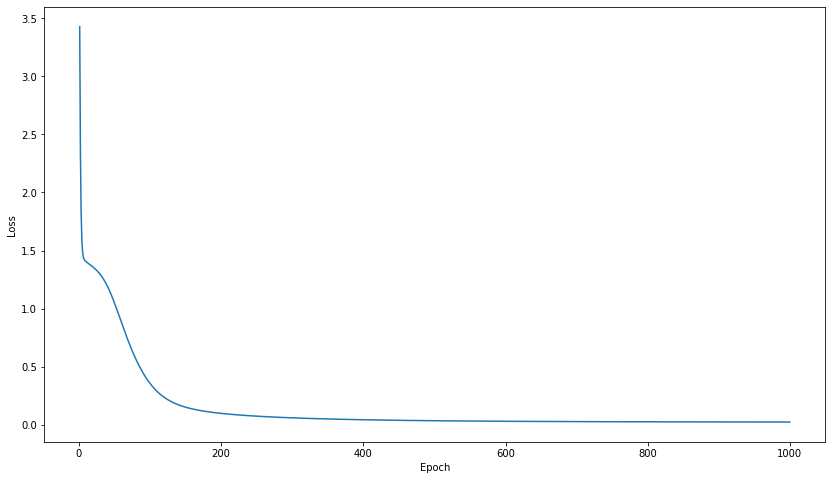

In [6]:
plt.figure(figsize=(14, 8))
plt.plot([i for i in range(1, 1001)], history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()